In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [160]:
df_train = pd.read_csv('train.csv')

In [161]:
df_test = pd.read_csv('test.csv')

****************
EXPLORATORY DATA ANALYSIS (EDA)
****************

In [163]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             1200 non-null   int64  
 1   number_of_elements             1200 non-null   int64  
 2   mean_atomic_mass               1200 non-null   float64
 3   wtd_mean_atomic_mass           1200 non-null   float64
 4   entropy_atomic_mass            1200 non-null   float64
 5   wtd_entropy_atomic_mass        1200 non-null   float64
 6   range_atomic_mass              1200 non-null   float64
 7   wtd_range_atomic_mass          1200 non-null   float64
 8   std_atomic_mass                1200 non-null   object 
 9   wtd_std_atomic_mass            1200 non-null   object 
 10  mean_fie                       1200 non-null   float64
 11  wtd_mean_fie                   1200 non-null   float64
 12  mean_atomic_radius             1200 non-null   f

In [130]:
# Check the object-type features
object_columns = df_train.select_dtypes(include='object').columns

In [164]:
# Check thier values -> seems there are missing data marked as (Nan) as string
df_train['std_atomic_mass'].unique()

array(['51.96882779', '47.09463317', '44.28945853', '64.45900432',
       '41.8090109', '46.05908282', '61.42030895', '52.81567963',
       '43.82335412', '59.66389153', '60.16614927', '53.2860956',
       '55.30769533', '56.7636543', '58.26271401', '58.97342845',
       '62.01143299', '54.87713673', '57.380427', '41.23812662',
       '40.91341801', '40.80997997', '40.54323707', '40.46755131',
       '40.2333118', '40.25019151', '39.86342571', '47.25055613',
       '47.99059762', '49.41329921', '51.10848403', '40.05351182',
       '43.02925033', '42.48809721', '50.80464634', '39.74604034',
       '71.19117078', '39.83472978', '43.90721593', '49.46613524',
       '39.44587456', '41.16285088', '61.55030198', '39.81774444',
       '40.12971393', '48.05526324', '45.43565657', '69.23265515',
       '40.82961457', '67.23383471', '40.39833492', '50.82597358',
       '48.84654141', '52.96152067', '61.61968167', '39.28890171',
       '39.96655428', '46.48233522', '53.04468026', '55.00839002',
 

In [132]:
# Rename column's name to remove the trailing whitespaces
df_train.rename(columns={'range_atomic_radius   ': 'range_atomic_radius'}, inplace=True)
df_train['range_atomic_radius'].unique()

array([205, 171, 147, 199, 190, 185, 211, 183, 158, 177, 178, 174, 195,
       142, 250, 217], dtype=int64)

In [133]:
df_test.rename(columns={'range_atomic_radius   ': 'range_atomic_radius'}, inplace=True)

In [134]:
# Convert Nan values from string to default one that python can understand
df_train[object_columns] = df_train[object_columns].replace('Nan', np.nan)

In [135]:
# Checking the missing data
df_train.isna().sum()

Id                               0
number_of_elements               0
mean_atomic_mass                 0
wtd_mean_atomic_mass             0
entropy_atomic_mass              0
wtd_entropy_atomic_mass          0
range_atomic_mass                0
wtd_range_atomic_mass            0
std_atomic_mass                  1
wtd_std_atomic_mass              1
mean_fie                         0
wtd_mean_fie                     0
mean_atomic_radius               0
wtd_mean_atomic_radius           0
range_atomic_radius              0
wtd_range_atomic_radius          0
std_atomic_radius                0
wtd_std_atomic_radius            0
mean_Density                     0
wtd_mean_Density                 0
entropy_Density                  0
wtd_entropy_Density              1
range_Density                    0
wtd_range_Density                0
std_Density                      1
wtd_std_Density                  0
mean_ElectronAffinity            0
wtd_mean_ElectronAffinity        0
entropy_ElectronAffi

In [136]:
# seems like there are only 5,and so they can be droped
df_train = df_train.dropna()

In [137]:
#Convert the object-type columns to numaric type
df_train[object_columns] = df_train[object_columns].apply(pd.to_numeric, errors='raise')

Text(0.5, 0, 'Temperature (in Kelvin)')

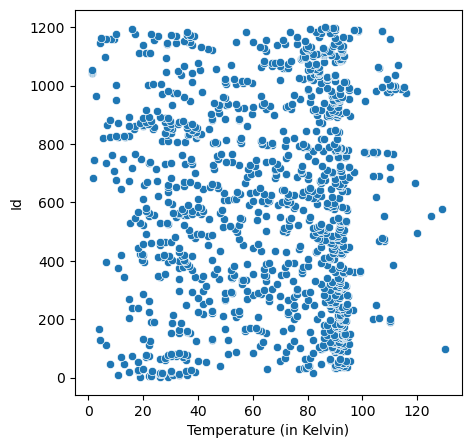

In [138]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = df_train, y = 'Id', x = 'critical_temp')
plt.xlabel('Temperature (in Kelvin)')

Reportedly, high-temperature superconductors can achieve critical temperatures above the boiling point of liquid nitrogen,
which is 77 K (or -196 °C), which explains why the majority of the data points are between 80-100 K.

As of 2023, the highest superconducting temperature achieved since the discovery of the phenomenon is approximately 250 K (−23 °C)

Having a material capable of displaying superconductivity at temperature above 0 °C (273 K; 32 °F) has not been achived yet.

In [139]:
df_train.corr()['critical_temp'].sort_values().drop(['critical_temp','Id'])
#'Id' is another form of indexing, has no corr to temperature

wtd_range_Valence               -0.316100
wtd_range_atomic_mass           -0.256819
wtd_mean_Valence                -0.250509
wtd_std_atomic_mass             -0.152086
wtd_range_atomic_radius         -0.127730
wtd_std_Valence                 -0.126073
wtd_range_ElectronAffinity      -0.111436
mean_Density                    -0.106376
wtd_mean_fie                    -0.105515
wtd_mean_ElectronAffinity       -0.104202
mean_Valence                    -0.053491
range_Valence                   -0.040353
std_Valence                     -0.040147
mean_ElectronAffinity           -0.029613
entropy_ElectronAffinity        -0.026418
wtd_mean_atomic_mass            -0.023789
mean_atomic_mass                -0.008920
entropy_Density                  0.009924
entropy_atomic_mass              0.012277
mean_fie                         0.021458
std_Density                      0.029055
range_Density                    0.040105
wtd_entropy_Density              0.040642
number_of_elements               0

The correlation values are ranging from -0.3 to +0.37, indicating a relatively weak linear relationship
between the features, which might mean more complex relationships or dependencies.

There may non-linear relationships exist, which may require more advanced modeling techniques.

<Axes: xlabel='range_atomic_radius', ylabel='critical_temp'>

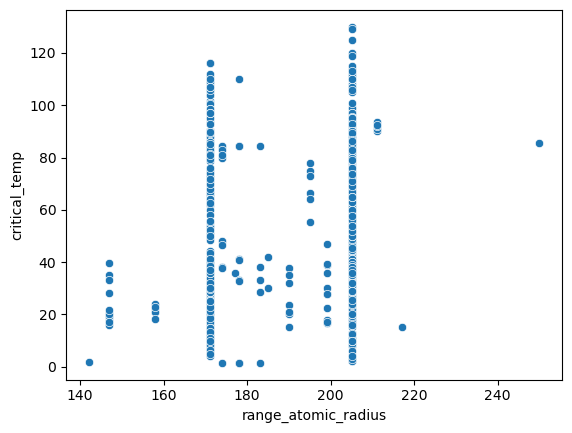

In [140]:
sns.scatterplot(data = df_train, y='critical_temp', x = 'range_atomic_radius')

<Axes: xlabel='number_of_elements', ylabel='count'>

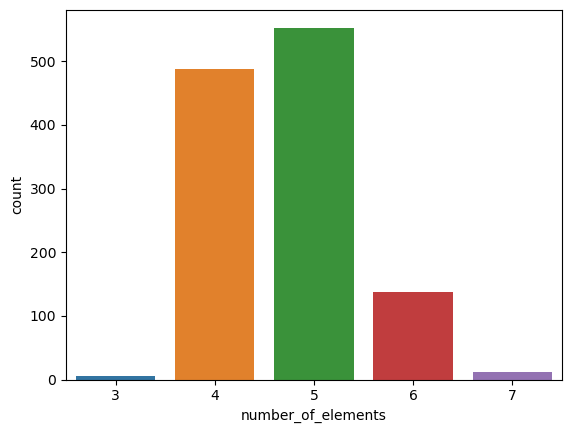

In [141]:
sns.countplot(data = df_train, x = 'number_of_elements')

<Axes: xlabel='wtd_std_ThermalConductivity', ylabel='critical_temp'>

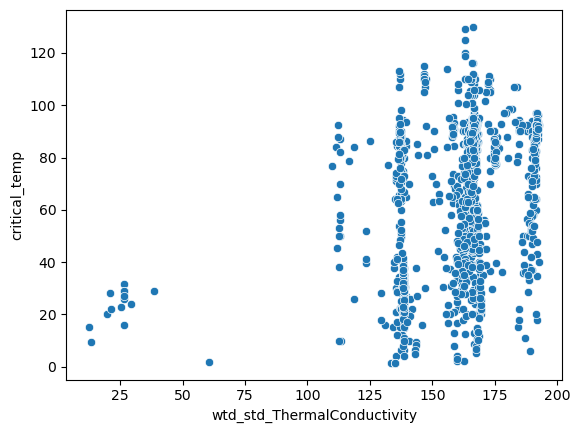

In [142]:
sns.scatterplot(data = df_train, y='critical_temp', x = 'wtd_std_ThermalConductivity')

The feature 'wtd_std_ThermalConductivity' exhibits a correlation of 0.37, which, while not exceptionally high, is relatively stronger compared to other features in the dataset. The plot suggests a noticeable pattern that could potentially be categorised into 5 or 6 average values. This categorisation might offer an opportunity for model improvement. However, given the project's primary focus on practice and learning, I have decided not to undertake further data processing at this stage.

******************************
CREATING THE MODEL
******************************

Considering the non-linearaty of the data and the low correlation between features, using Random Forest model was used

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X = df_train.drop(['critical_temp', 'Id'], axis=1)
y = df_train['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=100)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

In [147]:
# Calculate Mean Absolute Error (MAE) for evaluation

from sklearn.metrics import mean_absolute_error

rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'MAE for Random Forest Regression: {rf_mae}')

MAE for Random Forest Regression: 8.662539630854452


In [148]:
# Calculate Mean Squared Error (MSE) for evaluation

from sklearn.metrics import mean_squared_error

rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Mean Squared Error (MSE): {rf_mse}')

Mean Squared Error (MSE): 170.58488249664578


In [149]:
# Calculate R-Squared for evaluation

from sklearn.metrics import r2_score

r_squared = r2_score(y_test, rf_predictions)
print(f'R-squared (R²): {r_squared}')

R-squared (R²): 0.7716810128210267


In [153]:
# Calculate Mean Baseline MAE
mean_baseline = y_train.mean()

# Create an array of the mean baseline predictions for the length of the test set
mean_baseline_predictions = np.full_like(y_test, fill_value=mean_baseline)

# Calculate MAE for the mean baseline model
mean_baseline_mae = mean_absolute_error(y_test, mean_baseline_predictions)
print(f'MAE for Mean Baseline: {mean_baseline_mae}')

MAE for Mean Baseline: 24.384256424957545


In [154]:
# Calculate Median Baseline MAE
median_baseline = y_train.median()

# Create an array of the median baseline predictions for the length of the test set
median_baseline_predictions = np.full_like(y_test, fill_value=median_baseline)

# Calculate MAE for the median baseline model
median_baseline_mae = mean_absolute_error(y_test, median_baseline_predictions)
print(f'MAE for Median Baseline: {median_baseline_mae}')

MAE for Median Baseline: 22.76121338912134


Conclusion: The model yielded an R-Squared value of 0.77, signifying a reasonable fit to the data. With a Mean Absolute Error (MAE) of 8.6, the predicted critical temperatures exhibit a variation of 8.6 Kelvin from the true values. In the context of superconductivity materials, where the predominant values fall within the 80-100 Kelvin range, the MAE of 8.6 can be deemed reasonable at this stage. It positions the model as a valuable guide for developing new superconductivity materials, aligning well with the overarching goal of this dataset.

**************************
CALCULATE THE PREDICTIONS OF THE CRITICAL TEMPERATURE ON THE TEST SET
**************************

In [150]:
X_ct_test = df_test.drop(['Id'], axis=1)
critical_temp_prediction = rf_model.predict(X_ct_test)

Text(0.5, 0, 'Temperature (in Kelvin)')

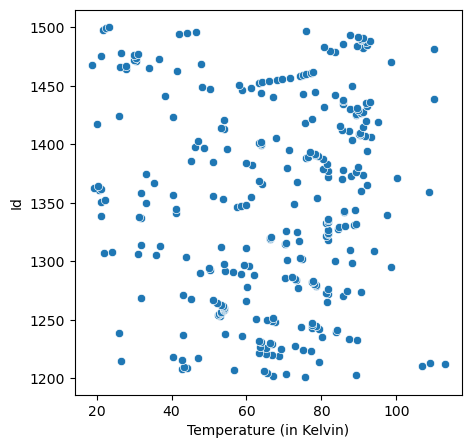

In [151]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = df_test, y = 'Id', x = ct_prediction)
plt.xlabel('Temperature (in Kelvin)')

In [152]:
print(critical_temp_prediction)

[ 75.66664444  66.95500873  89.12491699  70.52709811  65.34931018
  64.79020352  56.63693382  42.70584524  44.16084524  43.40417857
 106.874      112.89       108.88        79.25788333  26.45769084
  42.73257976  46.94979167  40.34575     68.64705     66.78208071
  65.114575    63.264625    77.13235929  75.06730333  69.1705
  65.223425    63.586575    73.02275     66.862025    66.28625833
  63.831625    63.264625    89.38028958  87.39020527  80.1644697
  58.75        43.018       54.35432857  26.102       83.95125
  84.11939048  79.4409619   77.34973333  74.62583333  78.42123333
  77.56683333  77.38183333  67.6974      66.83106667  65.470925
  62.64372143  67.1332      52.86615     52.32115     52.75515
  53.10425     53.18901429  54.11781429  54.12581429  54.0701
  53.6151      53.6151      53.2381      52.2354      81.35925
  59.86776667  51.132       45.101       31.95        85.8219
  42.97        81.8271      81.33721667  90.66769524  86.89375
  81.7321      73.6803      60.093366

In [155]:
df_test['critial_temp'] = critical_temp_prediction

In [159]:
# Create a separate DataFrame with 'Id' and predicted 'critical_temp' for the test set
result_df = pd.DataFrame({'Id': df_test['Id'], 'critical_Temp': critical_temp_prediction})

# Save the DataFrame to a CSV file
result_df.to_csv('predicted_results.csv', index=False)